In [6]:
## Figure 21. 2D histogram of average spatial coherence and temporal coherence all pixels on land from Sentinel-1 dataset

import os
import h5py
import numpy as np
from matplotlib import colors, pyplot as plt, ticker
from pysar.objects import sensor
from pysar.utils import readfile, plot as pp
from pysar.simulation.plot import *

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR')
os.chdir(work_dir)
proj_name = sensor.project_name2sensor_name(work_dir)[1]

spatial_coh_file = 'avgSpatialCoherence.h5'
temp_coh_file = 'temporalCoherence.h5'
temp_coh_file = 'UNW_COR/tempCoh_unwrapPhase.h5'
water_mask_file = 'waterMask.h5'

spatial_coh = readfile.read(spatial_coh_file)[0].flatten()
temp_coh = readfile.read(temp_coh_file)[0].flatten()
water_mask = readfile.read(water_mask_file)[0].flatten()
print('Done.')

Done.


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


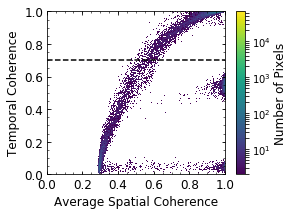

In [9]:
maskz = spatial_coh > 0.
maskz *= temp_coh > 0.
maskz = water_mask!=0   #pixels on land

fig, ax = plt.subplots(figsize=[4, 3])
plt.hist2d(spatial_coh[maskz], temp_coh[maskz], bins=1000, norm=colors.LogNorm(), cmin=2)

#colorbar
cbar = plt.colorbar()
cbar.set_label('Number of Pixels', fontsize=font_size)
#temporal coherence threshold
ax.plot([0, 1], [0.7, 0.7], 'k--')

#format
ax.tick_params(which='both', direction='in', top=True, bottom=True, left=True, right=True, labelsize=font_size)
ax.set_xlabel('Average Spatial Coherence', fontsize=font_size)
ax.set_ylabel('Temporal Coherence', fontsize=font_size)
ax.set_xlim(0, 1.001)
ax.set_ylim(0, 1.001)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))

plt.savefig('{}_coh_hist2d.png'.format(proj_name), bbox_inches='tight', transparent=True, dpi=fig_dpi)
plt.show()